In [3]:
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data, exposure
import cv2

In [4]:
!pip install face_recognition

In [5]:
from google.colab import files    #uploading a dataset from the local drive
uploaded = files.upload()

Saving Ronaldo_1.jpg to Ronaldo_1.jpg


In [6]:
image = cv2.imread('Ronaldo_1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

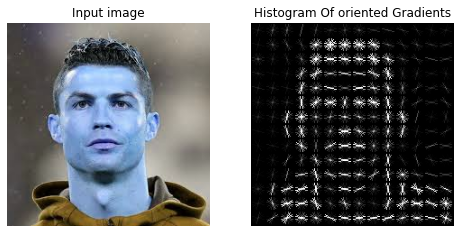

In [7]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16,16), cells_per_block=(1,1), visualize=True, multichannel=True)
fig, (ax1, ax2) = plt.subplots(1,2 , figsize=(8,4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0,10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram Of oriented Gradients')
plt.show()

In [15]:
image.shape

(225, 225, 3)

In [8]:
import face_recognition

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np
import cv2
%matplotlib inline

In [9]:
from google.colab import files    #uploading a dataset from the local drive
uploaded = files.upload()

Saving Ron_Dybala.jpg to Ron_Dybala.jpg


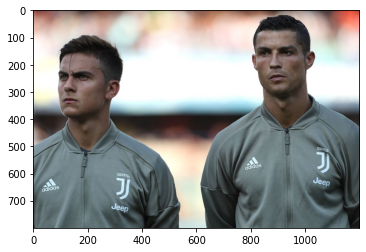

In [10]:
image = cv2.imread('Ron_Dybala.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [11]:
face_locations = face_recognition.face_locations(image)
num_of_faces = len(face_locations)
print(num_of_faces)

2


A face is located at pixel location Top: 799, Left: 98, Bottom: 985, Right: 284
A face is located at pixel location Top: 56, Left: 180, Bottom: 242, Right: 366


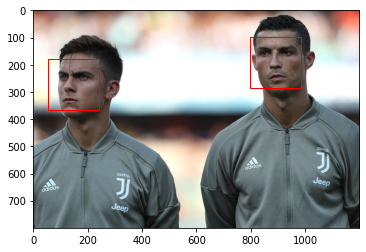

In [12]:
plt.imshow(image)
ax = plt.gca()

for face_location in face_locations:

  top, right, bottom, left = face_location
  x,y,w,h = left, top, right, bottom
  print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(x,y,w,h))

  rect = Rectangle((x,y), w-x, h-y, fill=False, color='red')
  ax.add_patch(rect)

plt.show()  

In [14]:
from google.colab import files    #uploading a dataset from the local drive
uploaded = files.upload()

from google.colab import files    #uploading a dataset from the local drive
uploaded = files.upload()

from google.colab import files    #uploading a dataset from the local drive
uploaded = files.upload()


Saving Ronaldo_1.jpg to Ronaldo_1 (2).jpg


Saving Eden_Hazard.jpg to Eden_Hazard.jpg


Saving Lewa.jpg to Lewa.jpg


In [16]:
image = cv2.imread('Ronaldo_1.jpg')
Ronaldo = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = cv2.imread('Eden_Hazard.jpg')
Hazard = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = cv2.imread('Lewa.jpg')
Lewa = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)



In [17]:
Ronaldo_encoding = face_recognition.face_encodings(Ronaldo)[0]
Hazard_encoding = face_recognition.face_encodings(Hazard)[0]
Lewa_encoding = face_recognition.face_encodings(Lewa)[0]

known_face_encodings = [Ronaldo_encoding, Hazard_encoding, Lewa_encoding ]

In [18]:

from google.colab import files    #uploading a dataset from the local drive
uploaded = files.upload()

Saving Hazard_2.jpg to Hazard_2.jpg


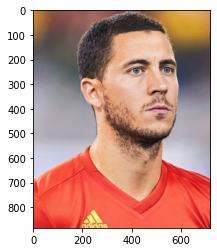

In [21]:
image = cv2.imread('Hazard_2.jpg')
unknown_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(unknown_image)

unknown_face_encodings = face_recognition.face_encodings(unknown_image)

In [22]:
from scipy.spatial import distance

for unknown_face_encoding in unknown_face_encodings:

  results= []
  for known_face_encoding in known_face_encodings:
    d = distance.euclidean(known_face_encoding, unknown_face_encoding)
    results.append(d)
  threshold = 0.6
  results = np.array(results) <= threshold

  name = "Unknown"

  if results[0]:
    name = "Ronaldo"
  elif results[1]:
    name = "Hazard"
  elif results[2]:
    name = "Lewa"

  print(f"Found {name} in the given photo!")        

Found Hazard in the given photo!
